In [1]:
import numpy as np

import mne
from mne.preprocessing import EOGRegression

In [2]:
raw = mne.io.read_raw_gdf("D:/Users/User/Documents/TCC Pós Graduação/src/datasources/BCICIV_2a_gdf/A01T.gdf",preload=True, eog=['EOG-left', 'EOG-central', 'EOG-right'],)


Extracting EDF parameters from D:\Users\User\Documents\TCC Pós Graduação\src\datasources\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


c:\Users\Vinícius\anaconda3\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


In [3]:
raw.ch_names

['EEG-Fz',
 'EEG-0',
 'EEG-1',
 'EEG-2',
 'EEG-3',
 'EEG-4',
 'EEG-5',
 'EEG-C3',
 'EEG-6',
 'EEG-Cz',
 'EEG-7',
 'EEG-C4',
 'EEG-8',
 'EEG-9',
 'EEG-10',
 'EEG-11',
 'EEG-12',
 'EEG-13',
 'EEG-14',
 'EEG-Pz',
 'EEG-15',
 'EEG-16',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [4]:
raw.load_data()


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [5]:
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [6]:
raw.filter(0, 120)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 122.50 Hz)
- Filter length: 165 samples (0.660 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s finished


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [7]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [8]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

'276' : 'Idling EEG (eyes open)'
'277' : 'Idling EEG (eyes closed)'
'768' : 'Start of a trial'
'769' : 'Cue onset left (class 1)'
'770' : 'Cue onset right (class 2)'
'771' : 'Cue onset foot (class 3)'
'772' : 'Cue onset tongue (class 4)'
'783' : 'Cue unknown'
'1023' : 'Rejected trial'
'1072' : 'Eye movements'
'32766' : 'Start of a new run'

In [9]:
event_id = {
 'reject':1,
 'Eye movements':2,
 'Idling EEG (eyes open)':3,
 'Idling EEG (eyes closed)':4,
 'Start of a new run':5,
 'Start of a trial':6,
 'Cue onset left (class 1)':7,
 'Cue onset right (class 2)':8,
 'Cue onset foot (class 3)':9,
 'Cue onset tongue (class 4)':10,
}
epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10,6],preload=True,on_missing ='warn')

Not setting metadata
576 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 576 events and 176 original time points ...
0 bad epochs dropped


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


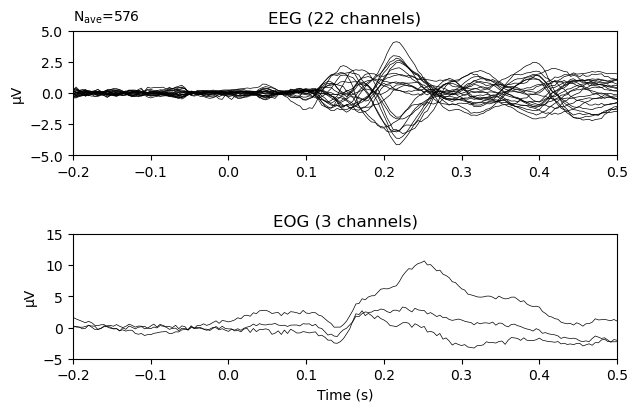

In [10]:
plot_kwargs = dict(picks="all", ylim=dict(eeg=(-5, 5), eog=(-5, 15)))

# plot the evoked for the EEG and the EOG sensors
fig = epochs.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)

In [11]:
model_plain = EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs)


No projector specified for this dataset. Please consider the method self.add_proj.


In [12]:
# fig = model_plain.plot(vlim=(None, 0.4))  # regression coefficients as topomap
# fig.set_size_inches(3, 2)

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


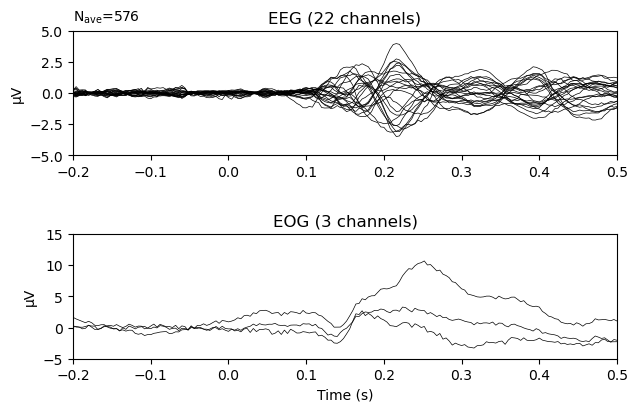

In [13]:
epochs_clean_plain = model_plain.apply(epochs)
# After regression, we should redo the baseline correction
epochs_clean_plain.apply_baseline()
# Show the evoked potential computed on the corrected data
fig = epochs_clean_plain.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)

In [14]:
# create epochs with the evoked subtracted out
epochs_sub = epochs.copy().subtract_evoked()



Subtracting Evoked from Epochs
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    The following channels are not included in the subtraction: EOG-right, EOG-central, EOG-left
[done]


In [15]:

# perform regression
model_sub = EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs_sub)



No projector specified for this dataset. Please consider the method self.add_proj.


In [16]:
# fig = model_sub.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


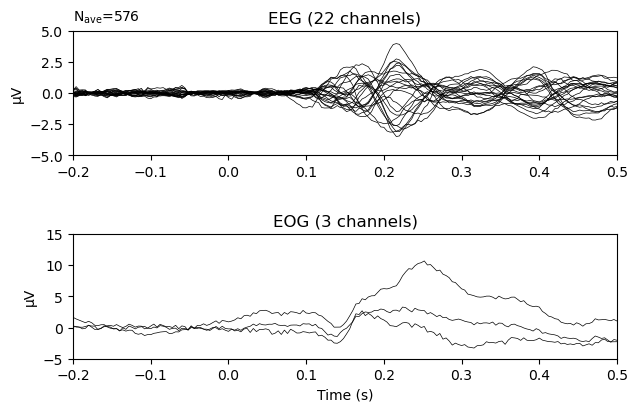

In [17]:

# apply the regression coefficients to the original epochs
epochs_clean_sub = model_plain.apply(epochs).apply_baseline()
fig = epochs_clean_sub.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)


Using EOG channels: EOG-left, EOG-central, EOG-right
EOG channel index for this subject is: [22 23 24]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 120.25 Hz)
- Filter length: 2500 samples (10.000 s)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Found 8 significant peaks
Number of EOG events detected: 8
Not setting metadata
8 matching events found
No baseline correction applied
Using data from preloaded Raw for 8 events and 251 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


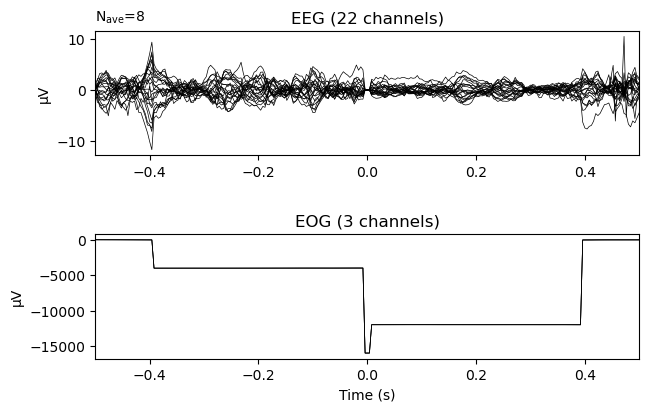

In [18]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, l_freq=0, h_freq=120)
# We need to explicitly specify that we want to average the EOG channel too.
eog_evoked = eog_epochs.average("all")
eog_evoked.plot("all")
fig.set_size_inches(6, 6)



In [19]:

# perform regression on the evoked blink response
model_evoked = EOGRegression(picks="eeg", picks_artifact="eog").fit(eog_evoked)
# fig = model_evoked.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


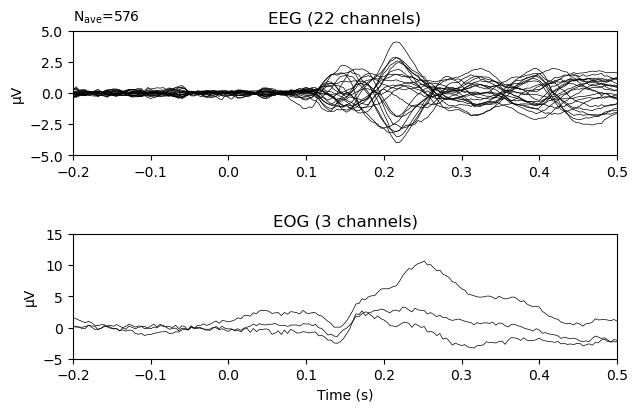

In [20]:

# apply the regression coefficients to the original epochs
epochs_clean_evoked = model_evoked.apply(epochs).apply_baseline()
fig = epochs_clean_evoked.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


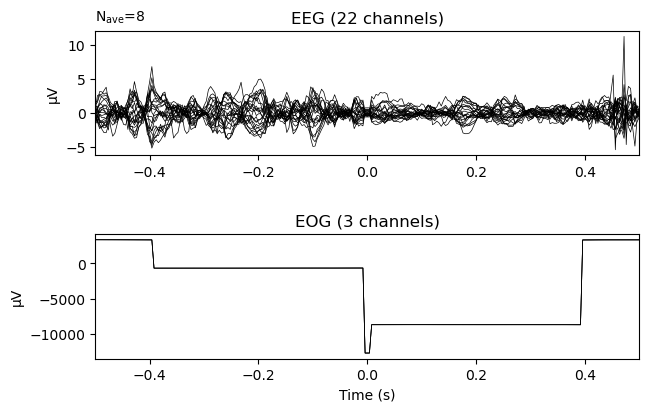

In [21]:

# for good measure, also show the effect on the blink evoked
eog_evoked_clean = model_evoked.apply(eog_evoked)
eog_evoked_clean.apply_baseline()
eog_evoked_clean.plot("all")
fig.set_size_inches(6, 6)

Using matplotlib as 2D backend.


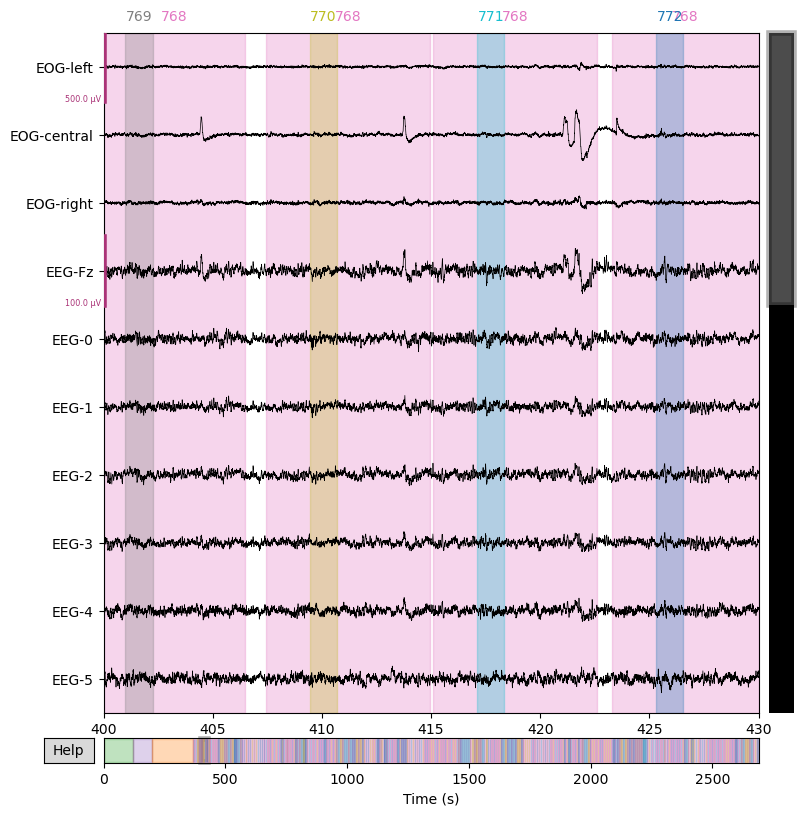

In [22]:
order = np.concatenate(
    [  # plotting order: EOG first, then EEG
        mne.pick_types(raw.info, meg=False, eog=True),
        mne.pick_types(raw.info, meg=False, eeg=True),
    ]
)
raw_kwargs = dict(
    events=eog_epochs.events,
    order=order,
    start=400,
    duration=30,
    n_channels=10,
    scalings=dict(eeg=50e-6, eog=250e-6),
)

# plot original data
raw.plot(**raw_kwargs)
print("")


No projector specified for this dataset. Please consider the method self.add_proj.


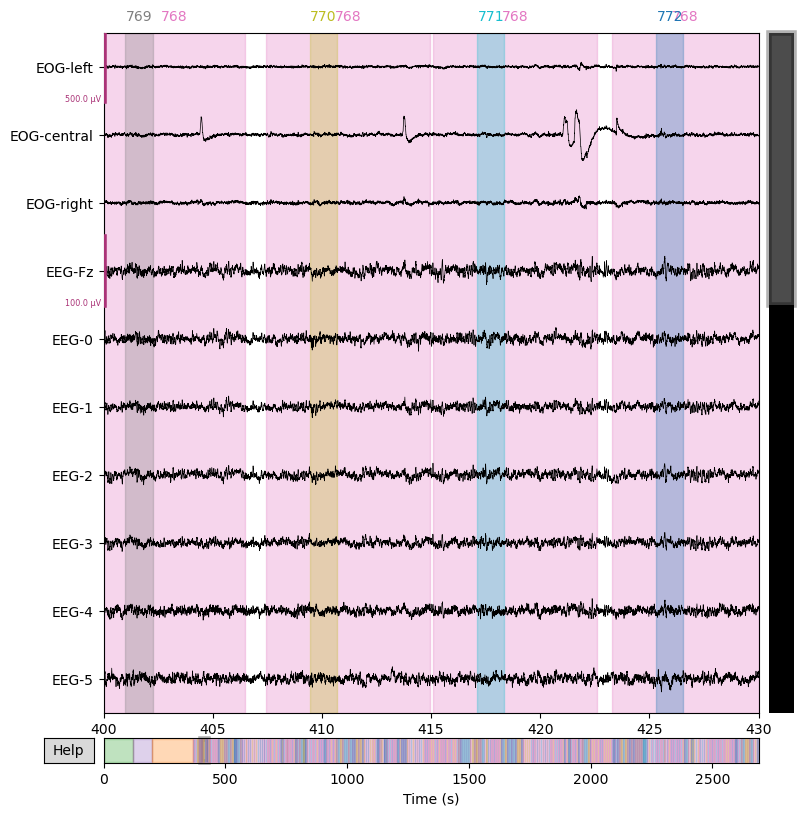

In [23]:

# regress (using coefficients computed previously) and plot
raw_clean = model_evoked.apply(raw)
raw_clean.plot(**raw_kwargs)
print("")

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


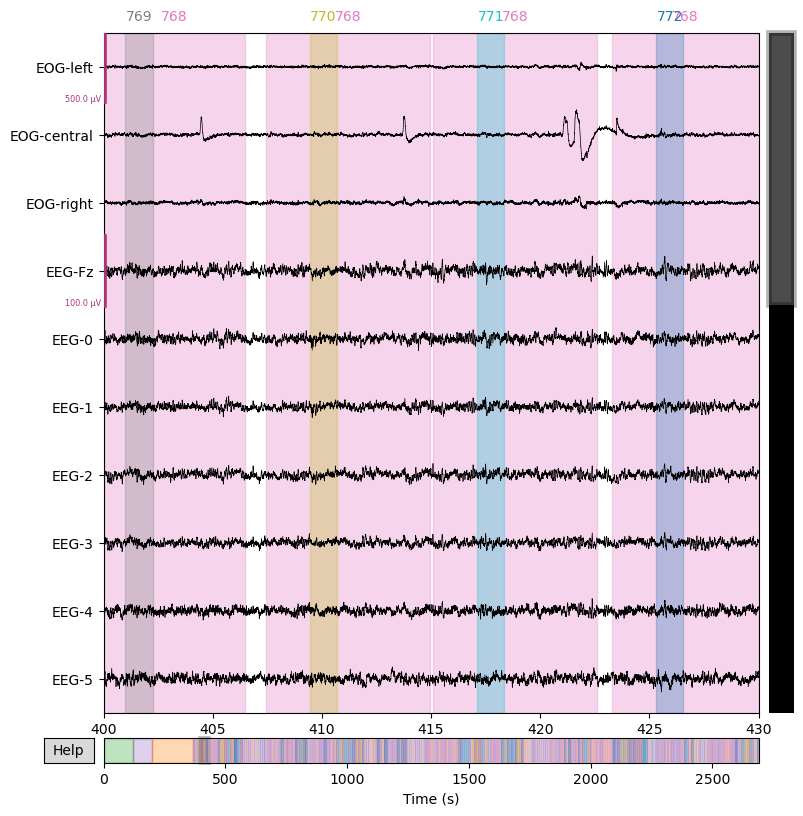

In [24]:

weights = EOGRegression().fit(raw)
raw_plain_clean = weights.apply(raw, copy=True)
# raw_plain_clean = epochs_clean_plain.raw("all")
raw_plain_clean.plot(**raw_kwargs)
print("")


In [25]:
epochs[0].to_data_frame()

,time,condition,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,...,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16,EOG-left,EOG-central,EOG-right
0,-0.200,6,7,-0.488805,-0.011764,-1.200545,1.424003,1.309242,5.635730,-4.888157,...,-0.074483,1.698793,4.838618,-5.483889,-2.702334,1.872191,-2.172076,6.596584,10.397518,-2.269072
1,-0.196,6,7,2.259662,-3.051169,1.564916,-1.491048,2.707708,1.943109,-1.280291,...,-2.623599,1.139975,3.665357,-4.457868,-1.142472,2.306691,0.796122,8.061428,12.838925,4.078585
2,-0.192,6,7,0.577835,1.445636,-0.231761,1.373426,-0.941568,3.000332,-1.527063,...,0.021307,-0.558177,2.235598,-3.976351,-1.438748,1.668641,0.989376,1.713771,6.491268,-3.245634
3,-0.188,6,7,0.963369,-1.076214,0.074589,-0.253929,-0.053981,1.079200,-0.084920,...,-0.747905,0.877300,2.528811,-1.259123,-0.139973,2.921632,2.098788,3.666896,10.885800,4.078585
4,-0.184,6,7,3.637796,-3.498229,1.802402,-0.098408,3.487265,3.239509,0.066237,...,-0.623764,-0.383545,0.209243,-0.282100,-0.478664,-0.596115,-0.840378,4.155178,10.885800,6.519991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.484,6,7,-15.479060,-5.433887,-5.522430,-6.374028,-9.447822,-9.294490,4.260038,...,2.670776,2.358788,-2.419392,12.032285,9.302907,5.408904,15.914831,-1.215916,-71.633732,6.519991
172,0.488,6,7,-17.171770,-5.407276,-7.009122,-7.370231,-10.606221,-7.880723,2.055068,...,4.484491,2.471771,-0.169875,11.064516,7.935778,5.695524,14.820930,-10.981541,-70.168888,2.125460
173,0.492,6,7,-19.772117,-4.967209,-8.440832,-9.089157,-11.932389,-8.698911,1.302298,...,3.911325,4.276054,3.842778,10.542433,7.706273,6.739885,15.445900,4.643459,-63.821232,5.543428
174,0.496,6,7,-19.387293,-4.426246,-8.109177,-9.553649,-11.505382,-8.151880,-0.028497,...,3.959723,4.395775,4.731662,10.245441,7.857572,8.792112,15.958902,1.225490,-69.192325,-1.292509


In [26]:
f = raw.to_data_frame()

In [27]:
f

,time,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16,EOG-left,EOG-central,EOG-right
0,0.000,3.515625,0.976562,3.173828,-0.488281,-1.074219,-3.271484,10.107422,2.148437,-0.781250,...,-5.957031,-4.980469,-2.001953,3.710937,-0.781250,-0.244141,4.980469,31.738281,-13.671875,-43.945312
1,0.004,3.459932,1.456957,1.067837,0.031199,-0.692292,0.125375,9.325862,2.629710,-2.925342,...,-5.677439,-5.332685,-0.745227,2.387729,-1.717810,-0.984649,2.052195,22.460938,-13.183594,-40.527344
2,0.008,6.315472,2.215638,3.093674,0.380157,1.191567,0.239039,9.474503,1.530522,-1.811990,...,-6.806514,-6.471323,-2.511860,0.548600,-3.153629,-2.324467,0.441327,33.691406,-8.300781,-38.574219
3,0.012,5.146912,8.121786,1.485628,0.965755,-2.326701,-0.214521,10.881177,5.489891,-3.705486,...,-5.954401,-7.020227,-3.706616,2.517417,-2.474524,-2.669023,3.949867,41.992188,-7.324219,-38.574219
4,0.016,5.779241,7.487070,4.705441,-1.310234,-2.270447,-4.715799,15.806362,6.751501,0.461162,...,-6.747978,-8.614743,-7.531426,6.547118,-1.491943,-3.348879,6.672824,37.109375,-15.136719,-49.804688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672523,2690.092,-8.818366,3.044808,1.623623,-0.798735,-6.171851,-7.146478,1.259693,3.729026,2.816260,...,3.345394,0.756262,-1.703183,3.966322,2.351280,0.700095,3.343439,-5.371094,-54.199219,0.000000
672524,2690.096,-6.300089,1.227547,2.636912,-0.830112,-4.793542,-6.638108,1.772912,1.519852,3.597768,...,3.225280,0.541677,-1.056006,2.743304,2.942151,0.836614,2.242807,-7.324219,-50.292969,4.394531
672525,2690.100,-5.258879,-0.254087,4.161047,1.510563,-1.542173,-5.031447,2.196462,1.210739,5.440775,...,3.411588,0.530581,-2.798410,0.133082,1.107353,-0.059572,-1.325649,6.347656,-37.109375,16.601562
672526,2690.104,-4.112042,-2.515072,3.651587,2.853338,1.842691,-1.636957,-0.298255,-1.245694,4.720692,...,1.877763,1.830203,-0.655039,-2.074332,-0.462005,-0.903296,-4.861726,-4.394531,-47.851562,12.695312


In [28]:
reader = mne.io.read_raw_gdf("D:/Users/User/Documents/TCC Pós Graduação/src/datasources/BCICIV_2a_gdf/A01T.gdf",preload=True, eog=['EOG-left', 'EOG-central', 'EOG-right'], verbose=0)


c:\Users\Vinícius\anaconda3\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [29]:
reader.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~112.9 MB, data loaded>

In [30]:
reader.get_data()

array([[-2.11425781e-05, -2.19238281e-05, -1.56250000e-05, ...,
         5.51757812e-06,  1.46484375e-06,  1.36718750e-06],
       [-2.36816406e-05, -2.39257812e-05, -1.97265625e-05, ...,
         1.04980469e-05,  3.07617188e-06,  3.51562500e-06],
       [-2.14843750e-05, -2.43164062e-05, -1.88476562e-05, ...,
         1.49414062e-05,  9.22851563e-06,  7.86132812e-06],
       ...,
       [-2.54394531e-05, -2.70996094e-05, -2.50976562e-05, ...,
         1.18652344e-05,  5.12695312e-06,  5.46875000e-06],
       [-2.49023437e-05, -2.63671875e-05, -2.42675781e-05, ...,
         1.06933594e-05,  4.68750000e-06,  6.20117187e-06],
       [-1.96777344e-05, -2.33398437e-05, -2.14843750e-05, ...,
         9.42382812e-06,  7.32421875e-07,  1.46484375e-06]])

In [31]:
raw.get_data()

array([[ 3.51562500e-06,  3.45993177e-06,  6.31547228e-06, ...,
        -5.25887924e-06, -4.11204232e-06, -5.47318892e-06],
       [ 9.76562500e-07,  1.45695697e-06,  2.21563797e-06, ...,
        -2.54087428e-07, -2.51507159e-06, -3.32475142e-06],
       [ 3.17382812e-06,  1.06783697e-06,  3.09367440e-06, ...,
         4.16104716e-06,  3.65158711e-06,  1.02095170e-06],
       ...,
       [ 3.17382813e-05,  2.24609375e-05,  3.36914062e-05, ...,
         6.34765625e-06, -4.39453125e-06, -4.39453125e-06],
       [-1.36718750e-05, -1.31835937e-05, -8.30078125e-06, ...,
        -3.71093750e-05, -4.78515625e-05, -4.54101562e-05],
       [-4.39453125e-05, -4.05273437e-05, -3.85742188e-05, ...,
         1.66015625e-05,  1.26953125e-05,  7.81250000e-06]])

In [32]:
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [33]:
events2 = mne.events_from_annotations(reader)
event_id = {
 'reject':1,
 'Eye movements':2,
 'Idling EEG (eyes open)':3,
 'Idling EEG (eyes closed)':4,
 'Start of a new run':5,
 'Start of a trial':6,
 'Cue onset left (class 1)':7,
 'Cue onset right (class 2)':8,
 'Cue onset foot (class 3)':9,
 'Cue onset tongue (class 4)':10,
}
epochs2 = mne.Epochs(raw, events2[0], event_id=[7,8,9,10],preload=True,on_missing ='warn', tmin= 0 , tmax= 2.0,baseline=(0, 0))

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 501 original time points ...
0 bad epochs dropped


In [34]:
ff = epochs2[0].to_data_frame(picks='all')

In [35]:
ff

,time,condition,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,...,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16,EOG-left,EOG-central,EOG-right
0,0.000,10,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004,10,8,2.736645,0.827328,2.955193,2.842998,2.812879,2.038852,-2.381243,...,-1.471696,-0.365035,-1.197101,-0.665364,-1.349943,-2.344981,-3.071065,5.859375,4.882812,10.253906
2,0.008,10,8,5.204679,1.977023,4.321788,3.832105,2.757757,0.847488,-1.386667,...,-1.249194,-3.250443,-3.498606,-0.707783,-1.832841,-4.034451,-2.865245,6.347656,2.441406,3.906250
3,0.012,10,8,7.012749,-0.260878,5.429929,2.830155,3.923399,-0.066933,-1.521534,...,-2.896036,-1.741073,-1.349731,-1.898976,-2.386268,-2.790353,-3.855014,5.371094,7.324219,2.441406
4,0.016,10,8,3.962284,-1.076097,4.246440,0.387645,1.947798,-2.896550,0.541152,...,-2.796190,-0.940673,0.662379,-1.128059,-2.401048,-2.167332,-3.832588,6.835937,6.347656,8.300781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.984,10,8,-7.590723,-6.042064,-6.474516,-6.669720,-1.928404,-1.593403,4.713429,...,-2.523286,4.525276,7.804390,4.303109,3.249806,4.616036,1.008592,2.441406,-9.277344,-6.347656
497,1.988,10,8,-6.488537,-3.792823,-5.632834,-6.914863,-2.703922,-2.441115,6.602265,...,-3.123670,3.824454,8.595176,2.911277,2.208832,4.239807,-0.501407,3.417969,-7.812500,-9.765625
498,1.992,10,8,-5.467926,-2.854980,-4.890194,-8.212211,-2.979406,-3.188522,7.564229,...,-4.163790,3.860210,10.513601,2.914683,2.489619,5.956112,1.817589,0.000000,0.000000,-2.929688
499,1.996,10,8,-5.383086,-3.752527,-4.038449,-8.539434,-2.329546,-3.134173,4.196196,...,-2.456166,5.469084,10.379483,2.447905,3.557182,6.367399,2.597280,-8.300781,-7.812500,-0.976562
